In [17]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [18]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01' , end='2020-04-04')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2020-03-30,255.520004,249.399994,250.740005,254.809998,41994100.0,254.809998
2020-03-31,262.489990,252.000000,255.600006,254.289993,49250500.0,254.289993
2020-04-01,248.720001,239.130005,246.500000,240.910004,44054600.0,240.910004


<function matplotlib.pyplot.show(*args, **kw)>

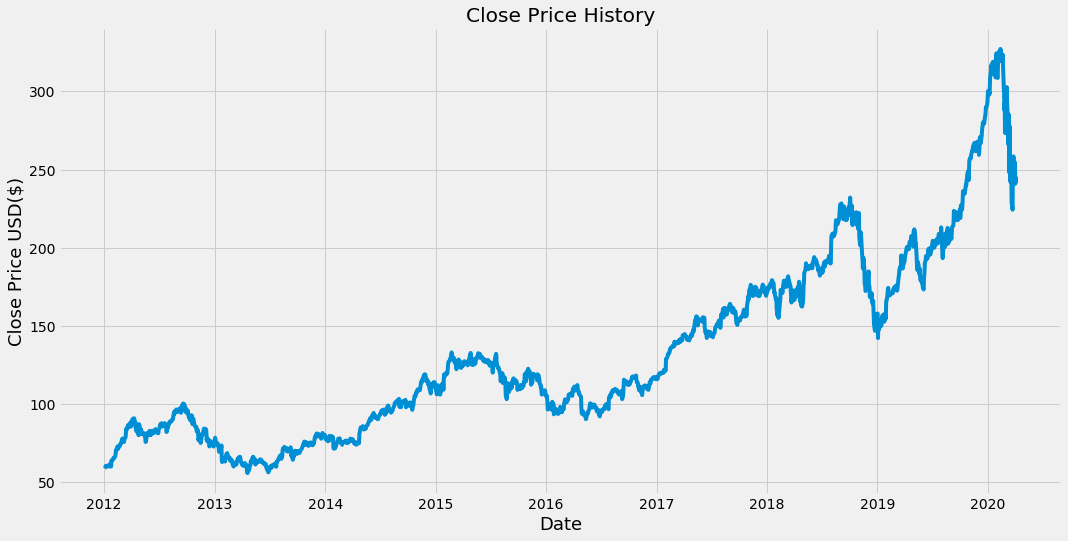

In [19]:
#visualisation of closing price
plt.figure(figsize=(16,8))

plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize= 18)
plt.ylabel('Close Price USD($)',fontsize = 18)
plt.show

In [20]:
data = df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1662

In [21]:
#scaling data
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)
scaler_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.6820677 ],
       [0.6968792 ],
       [0.68390993]])

In [26]:
train_data = scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range (60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]



In [27]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [28]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1602, 60, 1)

In [33]:
#building lsmt
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

model= Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [34]:
#loss function to tell how well the code is doing
model.compile(optimizer='adam',loss='mean_squared_error')
#https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [35]:
model.fit(x_train,y_train, batch_size=1, epochs =1)

Epoch 1/1
1602/1602 [==============================] - 170s 106ms/step - loss: 5.8273e-04


In [36]:
#creating final testing datasets in x and y
test_data = scaled_data[training_data_len-60: ,:]
x_test=[]
y_test = dataset[training_data_len:, :]
for i in range (60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [37]:
#CONVERTING TO NUMPY.ARRAY
x_test = np.array(x_test)

In [38]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [39]:
#prediction DL
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [46]:
rsme = np.sqrt(np.mean(predictions - y_test)**2)
rsme

3.513002179616905

C:\Users\Anushka\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


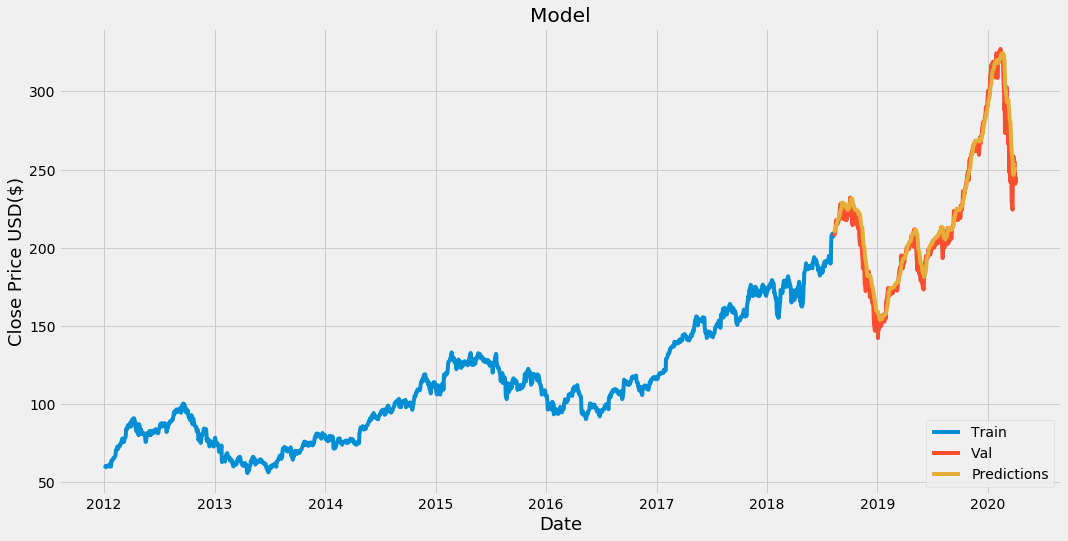

In [47]:
#plotting and visualising 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD($)',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()


In [48]:
#predictied price
valid

,Close,Predictions
Date,,
2018-08-10,207.529999,209.628143
2018-08-13,208.869995,210.650253
2018-08-14,209.750000,211.476791
2018-08-15,210.240005,212.198029
2018-08-16,213.320007,212.834564
...,...,...
2020-03-30,254.809998,249.076492
2020-03-31,254.289993,250.948120
2020-04-01,240.910004,252.857376


In [49]:
#printing predicted price
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01' , end='2020-04-01')
new_df= apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaler = scaler.transform(last_60_days)
X_test =[]
X_test.append(last_60_days_scaler)
X_test = np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_model = model.predict(X_test)
pred_model= scaler.inverse_transform(pred_model)
print(pred_model)

[[252.99251]]


In [51]:
#actual price
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-04-01' , end='2020-04-01')
print(apple_quote2['Close'])

Date
2020-03-31    254.289993
2020-04-01    240.910004
Name: Close, dtype: float64
